In [90]:
import torch
from torch.distributions import Normal
import matplotlib.pyplot as plt
import numpy as np
import unittest

In [91]:
from math import gamma
# Util functions

def gaussian_distribution_density_data(mu, sigma):
    """
    Given a mu and a sigma, this function returns a tuple
    representing the X and Y of the PDF
    Parameters
    ----------
    mu : int, required
        Distribution median
    sigma: int, required
        Standard deviation
    Returns
    -------
    data, gaussian_distribution
        a list of strings used that are the header columns
    """
    data = torch.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    gaussian_distribution = (1/(sigma * torch.sqrt(torch.tensor(2) * torch.pi))) * torch.exp(-0.5 * ((data - mu) / sigma)**2)
    return data, gaussian_distribution

def plot(X, mu1, sigma1, mu2, sigma2, title=''):
    """
    Plots two gaussian distributions
    Parameters
    ----------
    X: list, required
        List of integers, contains all data to display
    mu1 : int, required
        First distribution median
    sigma1: int, required
        First standard deviation
    mu2 : int, required
        Second distribution median
    sigma2: int, required
        Second standard deviation
    title: str, optional
        Title to show in plot visualization
    """
    # a) Scatter Plot with histograms
    # Histograms
    plt.hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
    # Scatter
    plt.scatter(X,torch.zeros(len(X)))
    # Density
    x1, gaussian_density_1 = gaussian_distribution_density_data(mu1, sigma1)
    x2, gaussian_density_2 = gaussian_distribution_density_data(mu2, sigma2)
    plt.plot(x1, gaussian_density_1, label=f'Gaussian (mu={mu1}, sigma={sigma1})', color='red')
    plt.plot(x2, gaussian_density_2, label=f'Gaussian (mu={mu2}, sigma={sigma2})', color='blue')
    if len(title):
        plt.title(title)
    plt.legend()
    plt.show()

def plot_multiple(X, mus, sigmas, titles, general_title = "", image_name = ""):
    rows = len(titles)
    fig, axes = plt.subplots(1, rows, figsize=(30, 5))

    for i in range(rows):
        axes[i].hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
        axes[i].scatter(X,torch.zeros(len(X)))
        mu1 = mus[i][0]
        mu2 = mus[i][1]
        sigma1 = sigmas[i][0]
        sigma2 = sigmas[i][1]
        x1, gaussian_density_1 = gaussian_distribution_density_data(mu1, sigma1)
        x2, gaussian_density_2 = gaussian_distribution_density_data(mu2, sigma2)
        axes[i].plot(x1, gaussian_density_1, label=f'Gaussian (mu={mu1}, sigma={sigma1})', color='red')
        axes[i].plot(x2, gaussian_density_2, label=f'Gaussian (mu={mu2}, sigma={sigma2})', color='blue')
        axes[i].set_title(titles[i])
        axes[i].legend()
    
    if len(general_title):
        fig.suptitle(general_title)
    plt.tight_layout()
    plt.savefig("{}.svg".format(image_name))

    plt.show()



# Trabajo Práctico 0: Algoritmo de Maximización de la Esperanza

X =  tensor([ 3.3961,  5.9930,  1.6039, 14.5180,  5.7423,  8.3912,  2.8914,  2.9186,
         6.3048,  5.5425,  5.3925,  9.0805,  6.4002,  3.9846,  5.3481,  9.0307,
         2.9070, 10.4700,  7.5806,  9.4788, 26.8083, 24.7036, 27.0629, 23.2148,
        25.4701, 23.9377, 24.3090, 24.7092, 23.8242, 23.0462, 21.9402, 26.5221,
        23.9396, 27.0123, 25.5427, 26.2734, 26.6232, 24.7837, 23.5694, 27.4754])


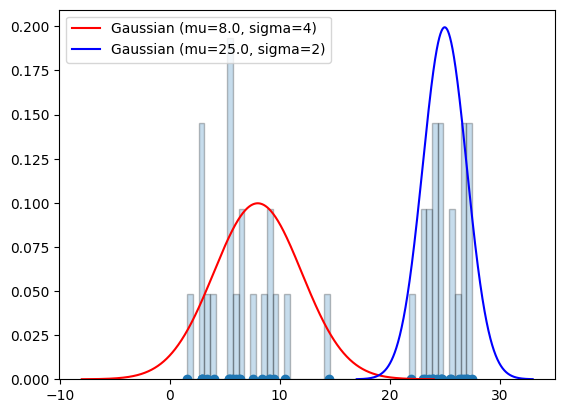

In [92]:
n = 20
mu1 = 8.0
sigma1 = 4
mu2 = 25.0
sigma2 = 2

# 1)
# Generates data that follows two gaussian distributions based on a set of parameters.
def generate_data(n, mu1, sigma1, mu2, sigma2):
  """
  Generates merged data from two gaussian distribution
  based on parameters
  Parameters
  ----------
  n: int, required
      Dimention of output data
  mu1 : int, required
      First distribution median
  sigma1: int, required
      First standard deviation
  mu2 : int, required
      Second distribution median
  sigma2: int, required
      Second standard deviation
  Returns
  -------
  Data
      A tensor data with contcatenation of 2
      gaussian distributions
  """
  # Generate distributions
  normal_dist1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))
  normal_dist2 = torch.distributions.Normal(torch.tensor([mu2]), torch.tensor([sigma2]))

  # Take a sample from each dist
  gaussian_sample1 = normal_dist1.sample((n,1)).squeeze()
  gaussian_sample2 = normal_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gaussian_sample1, gaussian_sample2))
  return X

X = generate_data(n, mu1, sigma1, mu2, sigma2)
print('X = ', X)

plot(X, mu1, sigma1, mu2, sigma2)



In [93]:
# 2)
def init_random_parameters(k=2, range=50):
  """
  Generates K set of random parameters of mu and sigma
  Parameters
  ----------
  K: int, required
      Number of set of parameters
  range : int, optional
      Maximum value a parameter could take
  Returns
  -------
  Matrix
      A Kx2 matrix of mu and sigma parameters
  """
  return torch.rand((k, 2))*range

P = init_random_parameters()
print('P = ', P)

P =  tensor([[11.7747, 41.7429],
        [26.3728,  0.7485]])


In [94]:
# 3)
def calculate_log_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
  """
  Calculates likelihood for gaussian distribution
  Parameters
  ----------
  x_n: tensor, required
      Gaussian observation data
  mu_k : int, required
      Distribution median
  sigma_k : int, required
      Standard deviation
  Returns
  -------
  Matrix
      A Kx2 matrix of mu and sigma parameters
  """
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)

likelihood_test = calculate_log_likelihood_gaussian_observation(X[0], mu1, sigma1)
print('likelihood_test = ', likelihood_test)

class LikelihoodGuassianUnitTest(unittest.TestCase):

    def test_likelihood_lower_real(self):
      test_data = torch.distributions.Normal(torch.tensor([4.0]), torch.tensor([8.0]))
      test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())

      real_lgo = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 4.0, 8.0)
      false_lgo = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 40.0, 7.0)
      self.assertTrue(abs(real_lgo) < abs(false_lgo))

    def test_likelihood_value(self):
      test_gaussian_sample = torch.tensor([0.34, 0.45, 0.78])
      likelihood = calculate_log_likelihood_gaussian_observation(test_gaussian_sample, 4.0, 8.0)
      self.assertAlmostEquals(float(likelihood), -3.2824, 3)

unittest.main(argv=[''], verbosity=2, exit=False)

test_likelihood_lower_real (__main__.LikelihoodGuassianUnitTest) ... C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())
ok
test_likelihood_value (__main__.LikelihoodGuassianUnitTest) ... C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:36: DeprecationWarning: Please use assertAlmostEqual instead.
  self.assertAlmostEquals(float(likelihood), -3.2824, 3)
ok
test_calculate_membership_all_k0 (__main__.MembershipDatasetUnitTest) ... C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  

likelihood_test =  tensor(-2.9676)


In [95]:
# 4)
def calculate_membership_dataset(X_dataset, Parameters_matrix):
  """
  Calculates membership of elements in X_dataset for each cluster K,
  where Parameters_matrix dimension is Kx2
  Parameters
  ----------
  X_dataset: tensor, required
      Data to determine membership
  Parameters_matrixk : tensor, required
      K set of parameters of mu and sigma
  Returns
  -------
  Matrix
      Membership matrix
  """
  N = len(X_dataset)
  K = Parameters_matrix.shape[0]
  M = torch.zeros(N, K)

  # for each element in X, calculate its likelyhood with each set of parameters from the Parameter Matrix and store the maximum
  for x in range(N):
    # set max likelyhood initially as a very low number (Me suena que esto también podría ponerse de una mejor forma)
    x_max_likelyhood = -np.inf
    k_membership = np.inf
    # iterate over the parameter sets to find which set achieves max likelihood over x
    for k_index, parameters in enumerate(Parameters_matrix):
      x_likelyhood = calculate_log_likelihood_gaussian_observation(X_dataset[x].clone(), parameters[0], parameters[1])
      if x_likelyhood > x_max_likelyhood:
        x_max_likelyhood = x_likelyhood
        k_membership = k_index
    if k_membership != np.inf:
      M[x][k_membership] = 1
    else:
      return None

  return M

M = calculate_membership_dataset(X, P)
print('M = ', M)

class MembershipDatasetUnitTest(unittest.TestCase):

    def test_calculate_membership_all_k0(self):
      parameters = torch.tensor([[8.5, 4.5], [0.0, 0.0]])
      dataset = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([4.0]))
      membership = calculate_membership_dataset(dataset.sample((10,1)).squeeze().clone(), parameters)
      expected = torch.tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
      self.assertTrue(torch.equal(expected, membership))

    def test_calculate_membership_all_k1(self):
      parameters = torch.tensor([[0.0, 0.0], [8.5, 4.5]])
      dataset = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([4.0]))
      membership = calculate_membership_dataset(dataset.sample((10,1)).squeeze().clone(), parameters)
      expected = torch.tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
      self.assertTrue(torch.equal(expected, membership))

    def test_calculate_membership_none(self):
      parameters = torch.tensor([[0.0, 0.0], [0.0, 0.0]])
      dataset = torch.distributions.Normal(torch.tensor([8.0]), torch.tensor([4.0]))
      membership = calculate_membership_dataset(dataset.sample((10,1)).squeeze().clone(), parameters)
      self.assertEqual(membership, None)

    def test_calculate_membership_mix_k(self):
      parameters = torch.tensor([[4.0, 2.0], [8.5, 4.5]])
      dataset = torch.tensor([6.6723, 8.7814, 6.9761, 6.2105, 8.9335])
      membership = calculate_membership_dataset(dataset.clone(), parameters)
      expected = torch.tensor([
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])
      self.assertTrue(torch.equal(expected, membership))

unittest.main(argv=[''], verbosity=2, exit=False)

C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)
test_likelihood_lower_real (__main__.LikelihoodGuassianUnitTest) ... C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_gaussian_sample = torch.tensor(test_data.sample((30,1)).squeeze())
ok
test_likelihood_value (__main__.LikelihoodGuassianUnitTest) ... C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:36: DeprecationWarning: Please use assertAlmo

M =  tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])


In [96]:
#5)

def recalculate_parameters(X_dataset, Membership_data):
    """
    Recalculates parameters mu and sigma for each membership
    Parameters
    ----------
    X_dataset: tensor, required
        Data to determine membership
    Membership_data : tensor, required
        Indicates for each element in X_dataset its membership
        to some K cluster
    Returns
    -------
    Matrix
        Kx2 set of parameters mu and sigma for k clusters
    """
    # TODO: Can we improve this to use torch?
    membership_k1 = Membership_data[:,0]
    membership_k2 = Membership_data[:,1]
    k1_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k1[index] == 1])
    k2_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k2[index] == 1])
    mu_1 = torch.mean(k1_tentative_values)
    mu_2 = torch.mean(k2_tentative_values)
    sigma_1 = torch.std(k1_tentative_values)
    sigma_2 = torch.std(k2_tentative_values)
    return torch.tensor([[mu_1, sigma_1],[mu_2, sigma_2]])

print('Real parameters k1=[{},{}], k2=[{},{}] '.format(mu1, sigma1, mu2, sigma2))
print('Old P parameters: ', P)
P = recalculate_parameters(X, M)
print('New P parameters: ', P)

Real parameters k1=[8.0,4], k2=[25.0,2] 
Old P parameters:  tensor([[11.7747, 41.7429],
        [26.3728,  0.7485]])
New P parameters:  tensor([[10.7573,  8.0662],
        [25.9458,  1.0746]])


In [97]:
# 7)
def random_parameters_heuristic(X):
    """
    Generates K=2 set of parameters mu and sigma for gaussian
    distribution based on heursitic
    Parameters
    ----------
    X: tensor, required
        Gaussian distribution data
    Returns
    -------
    Matrix
        Kx2 set of parameters mu and sigma for K=2 clusters
    """
    mu = torch.mean(X, dim=0)
    sigma = torch.std(X, dim=0)
    mu_below = mu - sigma
    mu_above = mu + sigma
    mu1 = (mu - mu_below) * torch.rand(1) + mu_below
    sigma1 = (sigma / 2 - sigma / 4) * torch.rand(1) + sigma / 4
    mu2 = (mu_above - mu) * torch.rand(1) + mu
    sigma2 = (sigma / 2 - sigma / 4) * torch.rand(1) + sigma / 4
    return torch.tensor([[mu1, sigma1], [mu2, sigma2]])



PI = random_parameters_heuristic(X)
print(PI)

tensor([[15.6512,  3.1251],
        [18.2454,  4.3118]])


C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


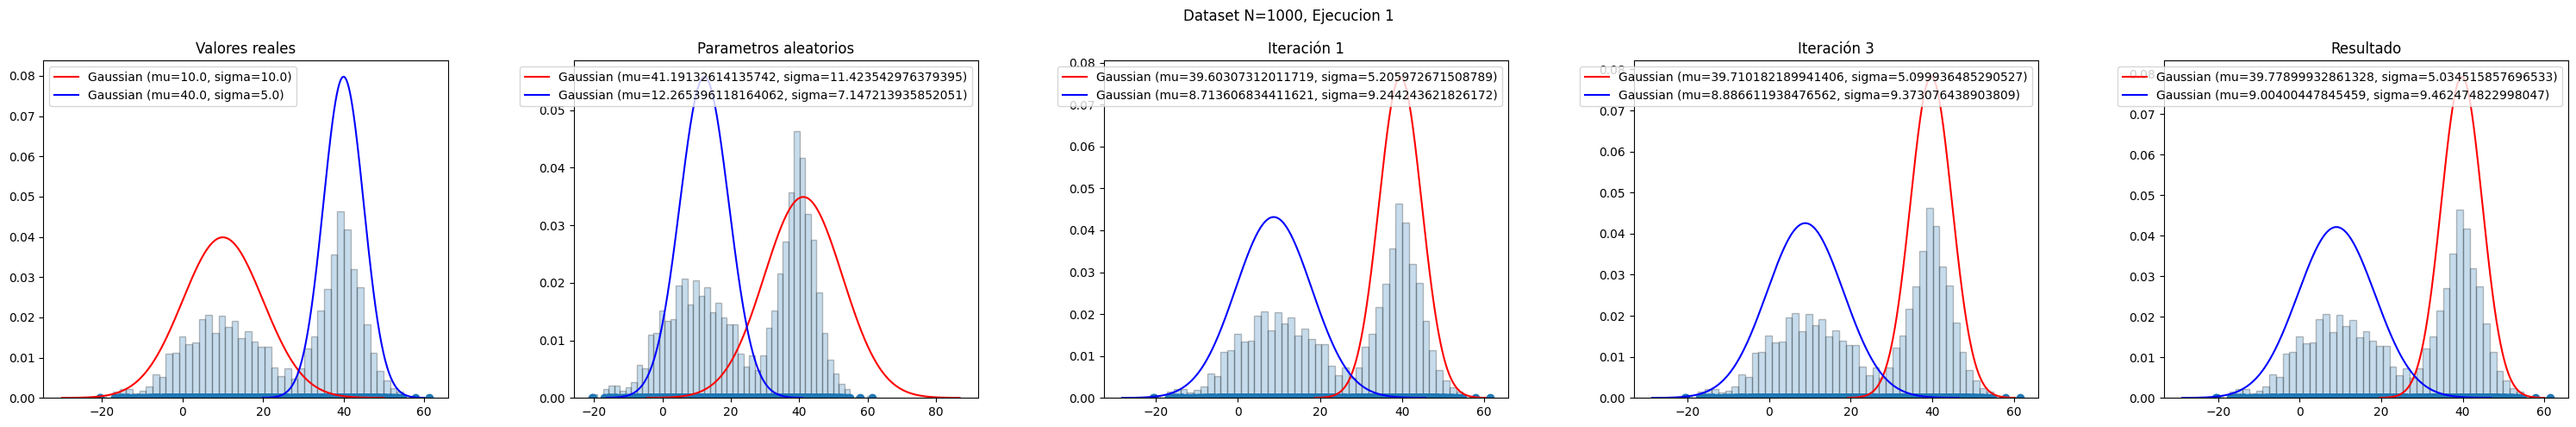

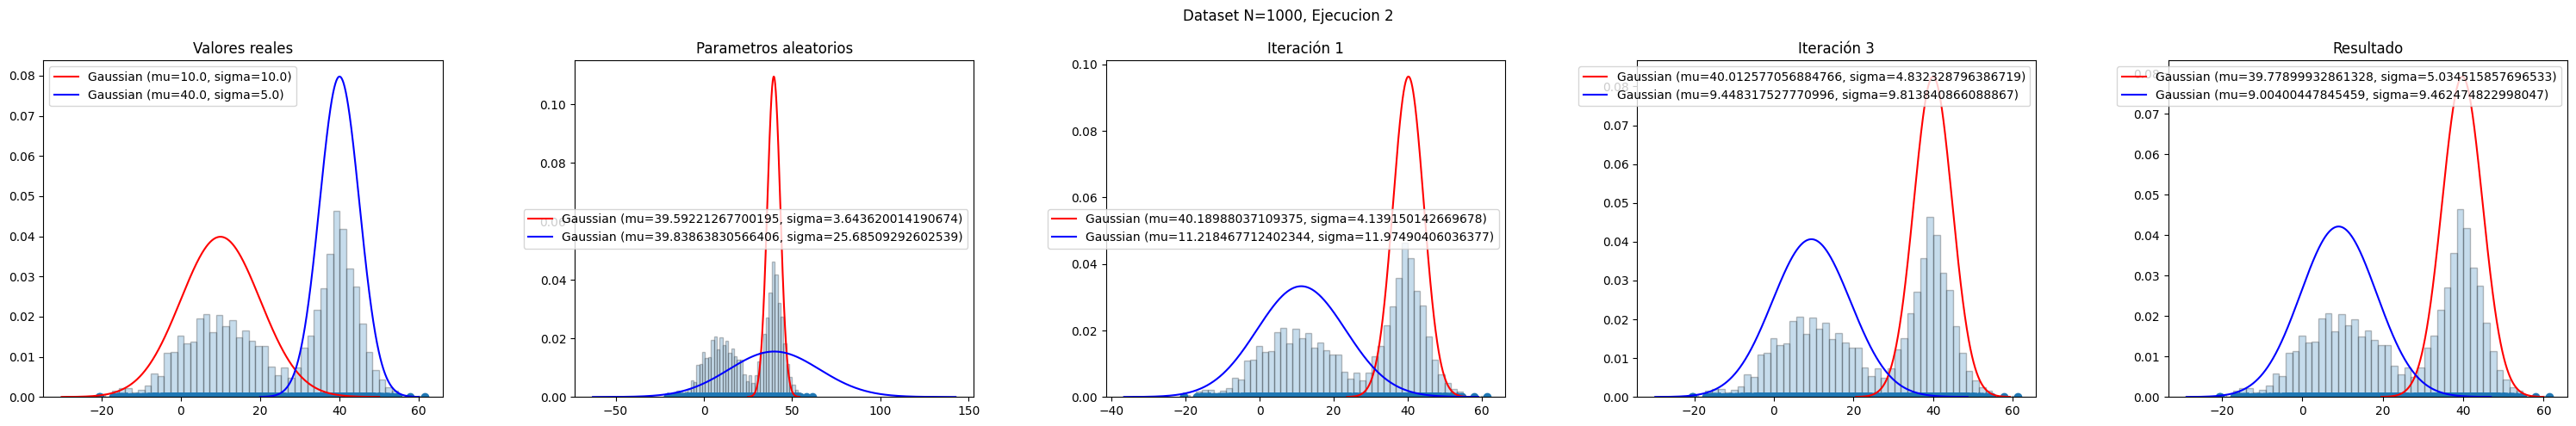

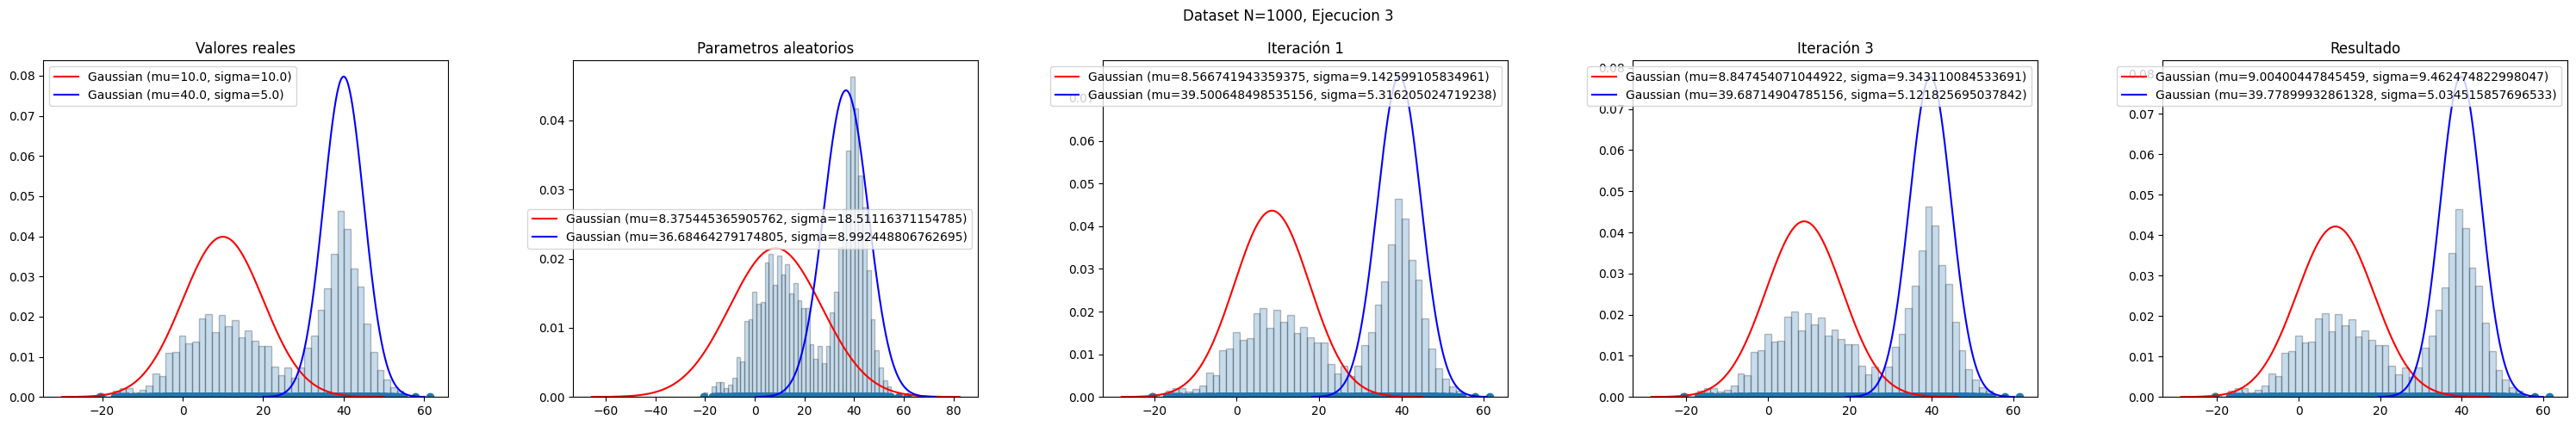

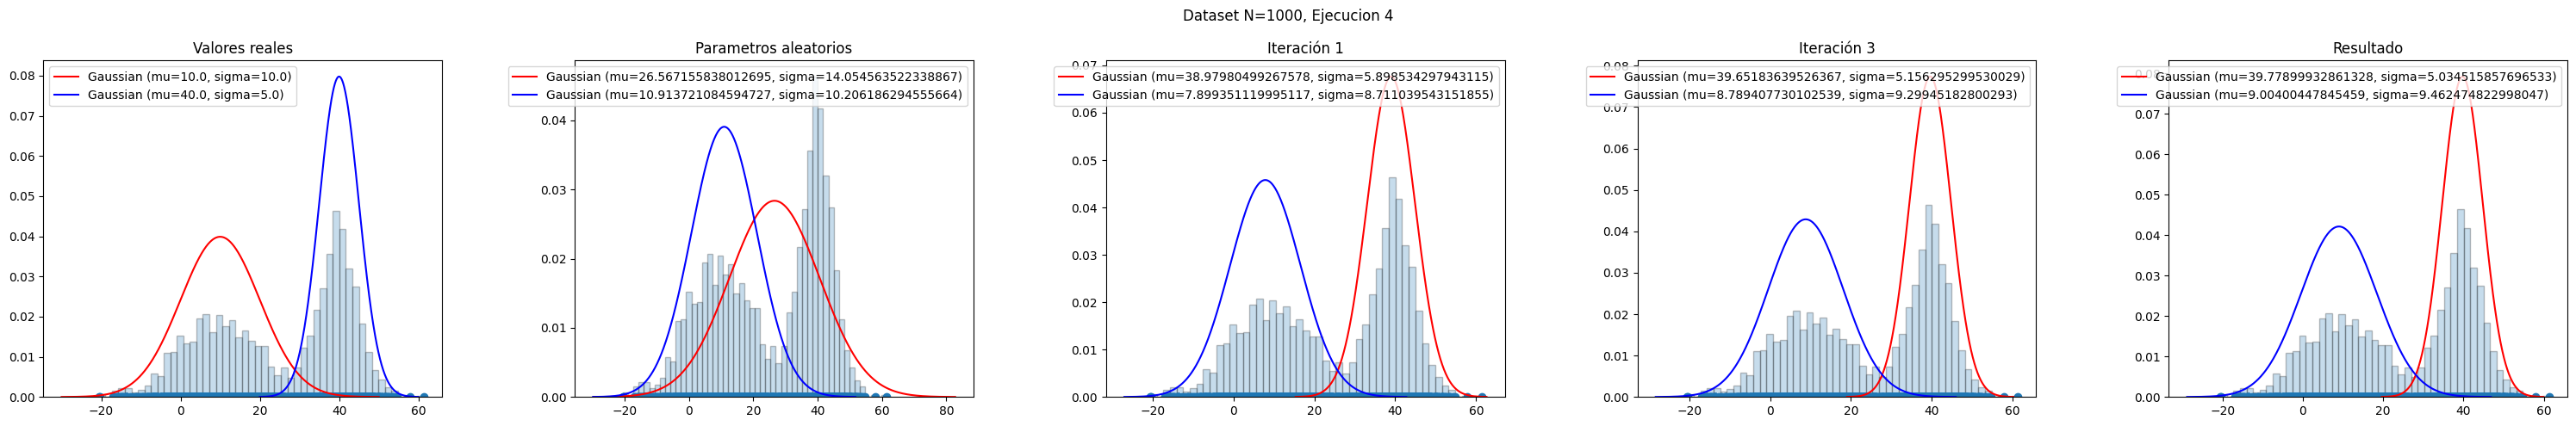

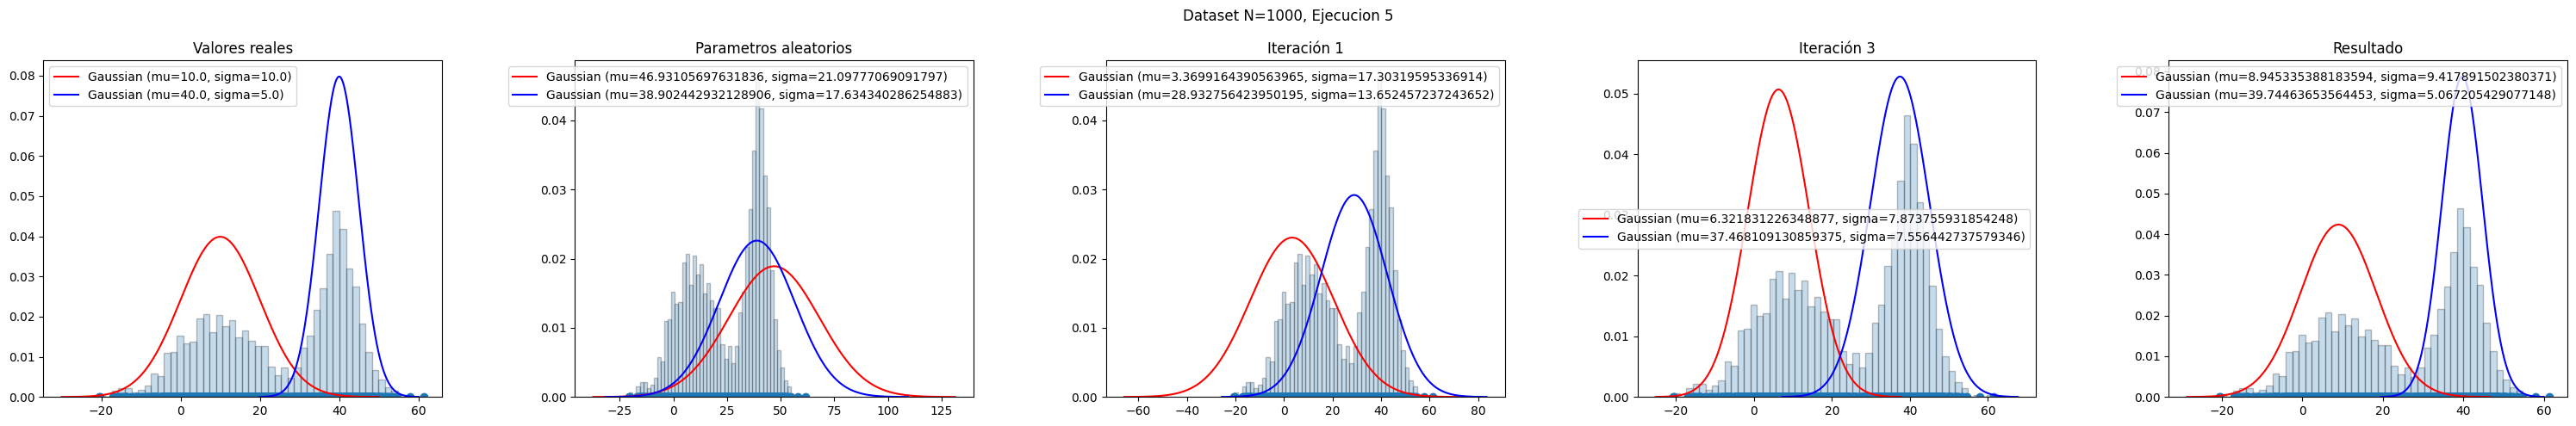

1 & 41.19, 11.42 & 39.78, 5.03 & 12.27, 7.15 & 9.0, 9.46 \\ \hline 
2 & 39.59, 3.64 & 39.78, 5.03 & 39.84, 25.69 & 9.0, 9.46 \\ \hline 
3 & 8.38, 18.51 & 9.0, 9.46 & 36.68, 8.99 & 39.78, 5.03 \\ \hline 
4 & 26.57, 14.05 & 39.78, 5.03 & 10.91, 10.21 & 9.0, 9.46 \\ \hline 
5 & 46.93, 21.1 & 8.95, 9.42 & 38.9, 17.63 & 39.74, 5.07 \\ \hline 



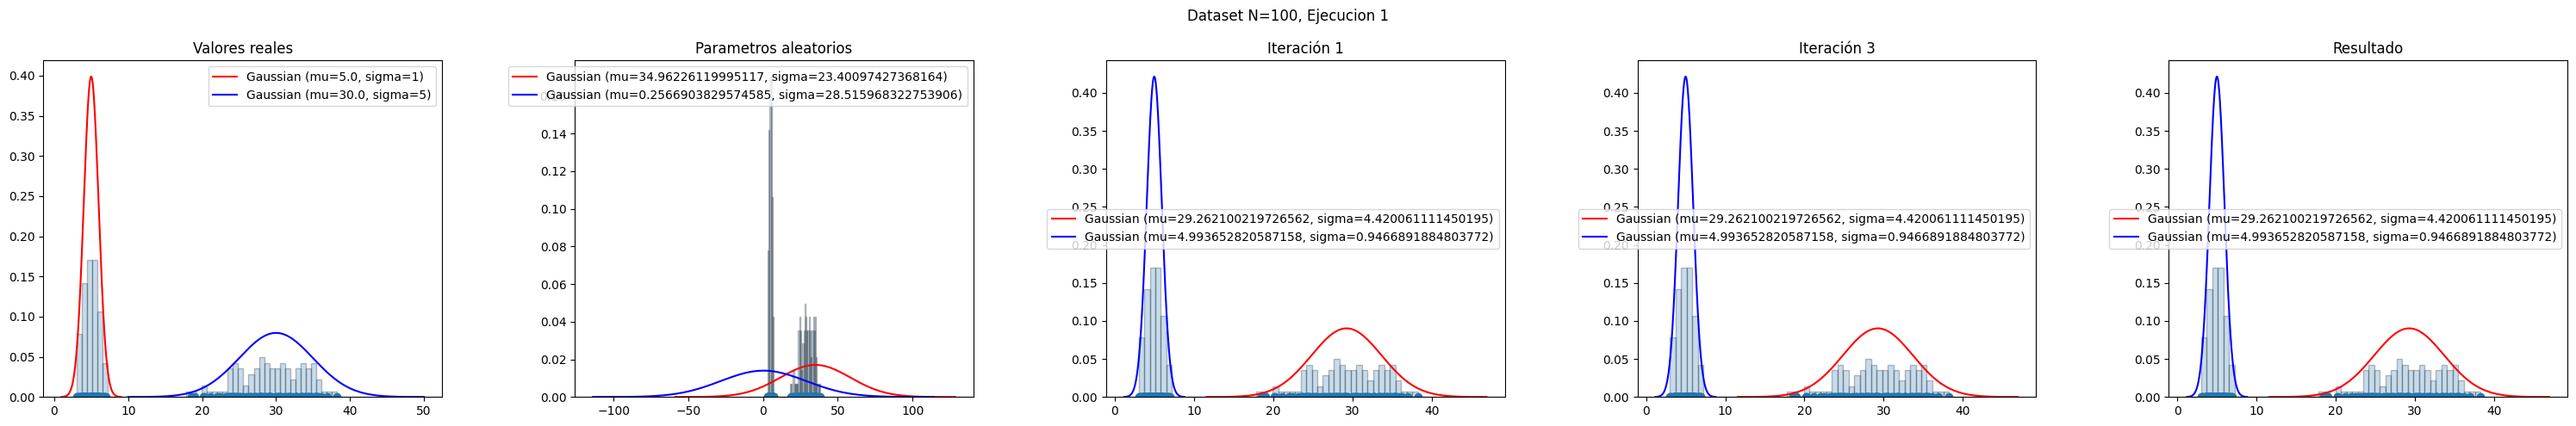

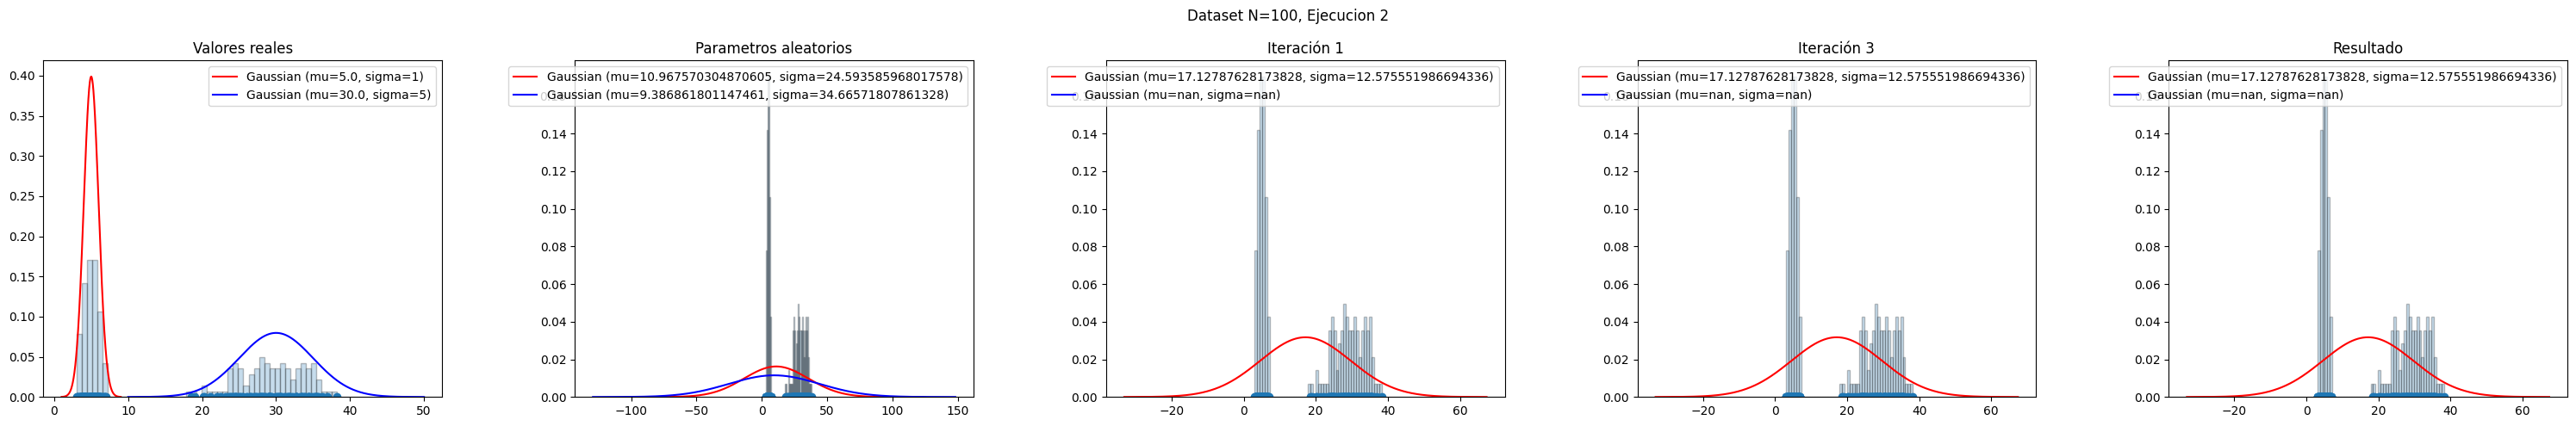

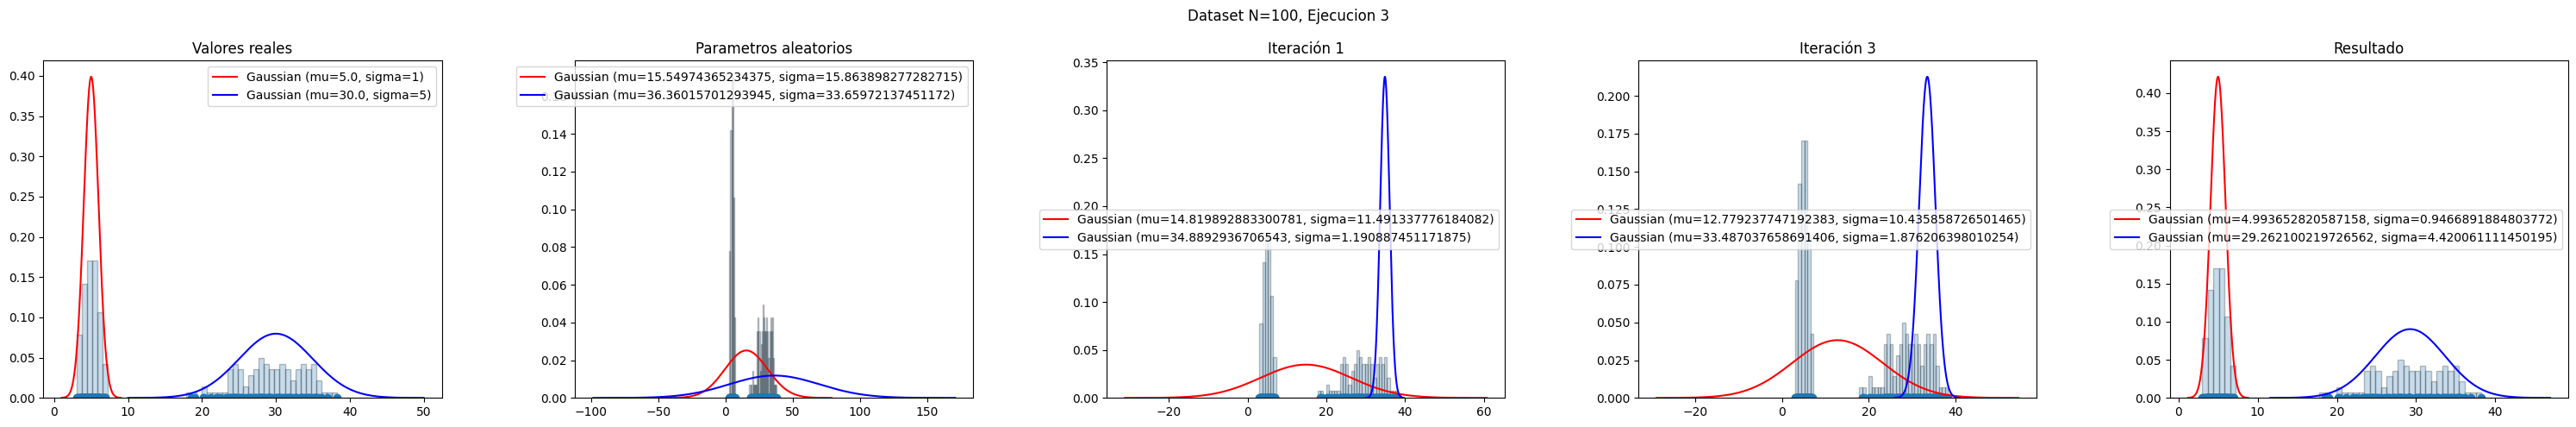

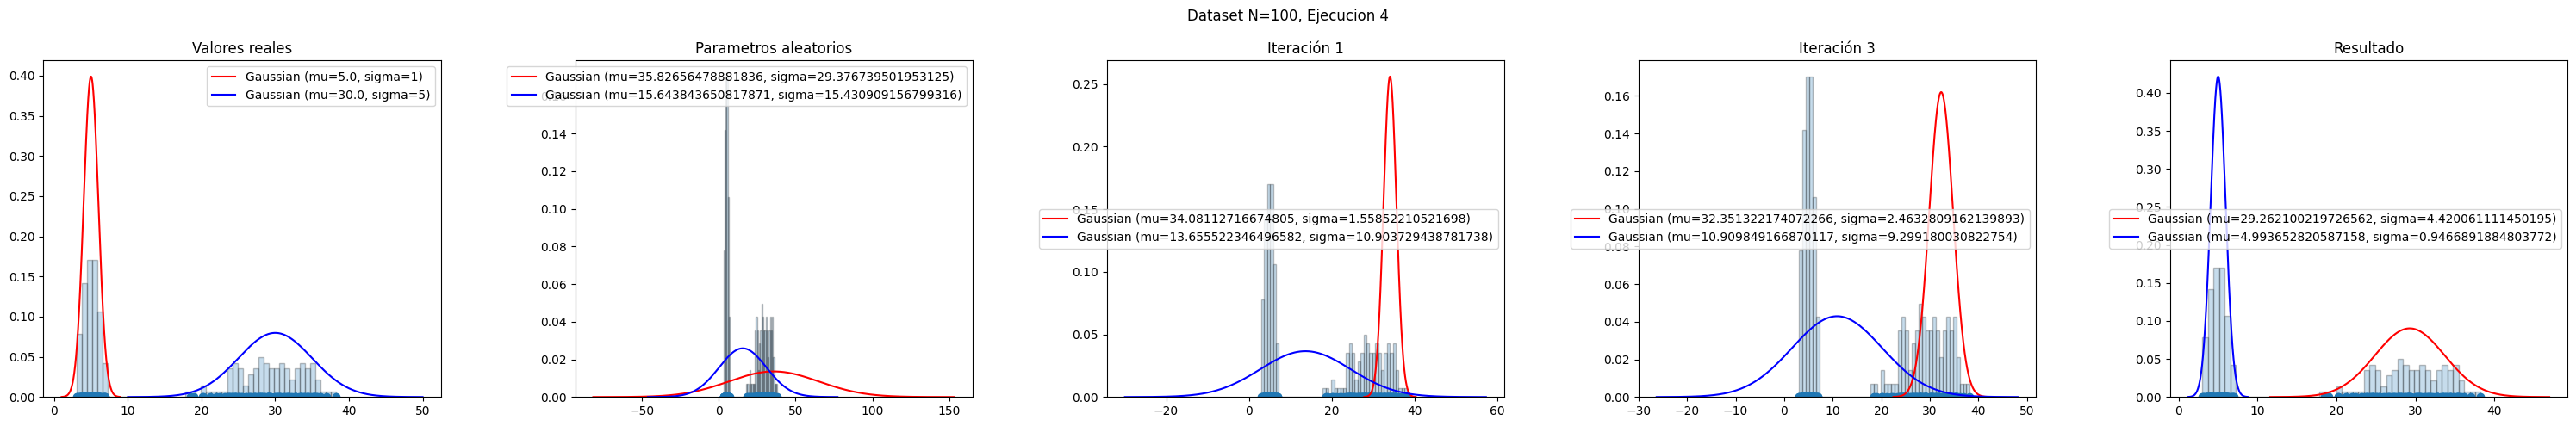

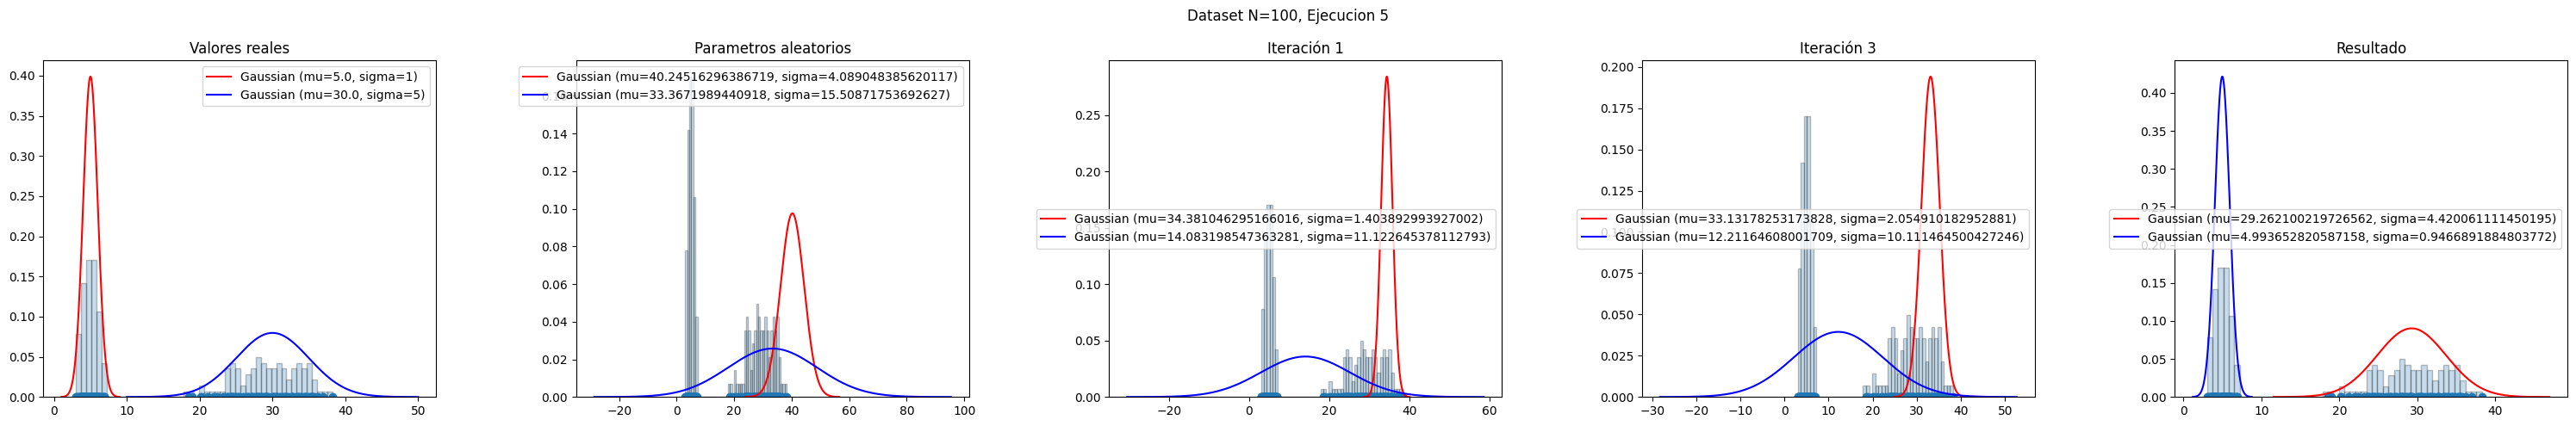

1 & 34.96, 23.4 & 29.26, 4.42 & 0.26, 28.52 & 4.99, 0.95 \\ \hline 
2 & 10.97, 24.59 & 17.13, 12.58 & 9.39, 34.67 & nan, nan \\ \hline 
3 & 15.55, 15.86 & 4.99, 0.95 & 36.36, 33.66 & 29.26, 4.42 \\ \hline 
4 & 35.83, 29.38 & 29.26, 4.42 & 15.64, 15.43 & 4.99, 0.95 \\ \hline 
5 & 40.25, 4.09 & 29.26, 4.42 & 33.37, 15.51 & 4.99, 0.95 \\ \hline 



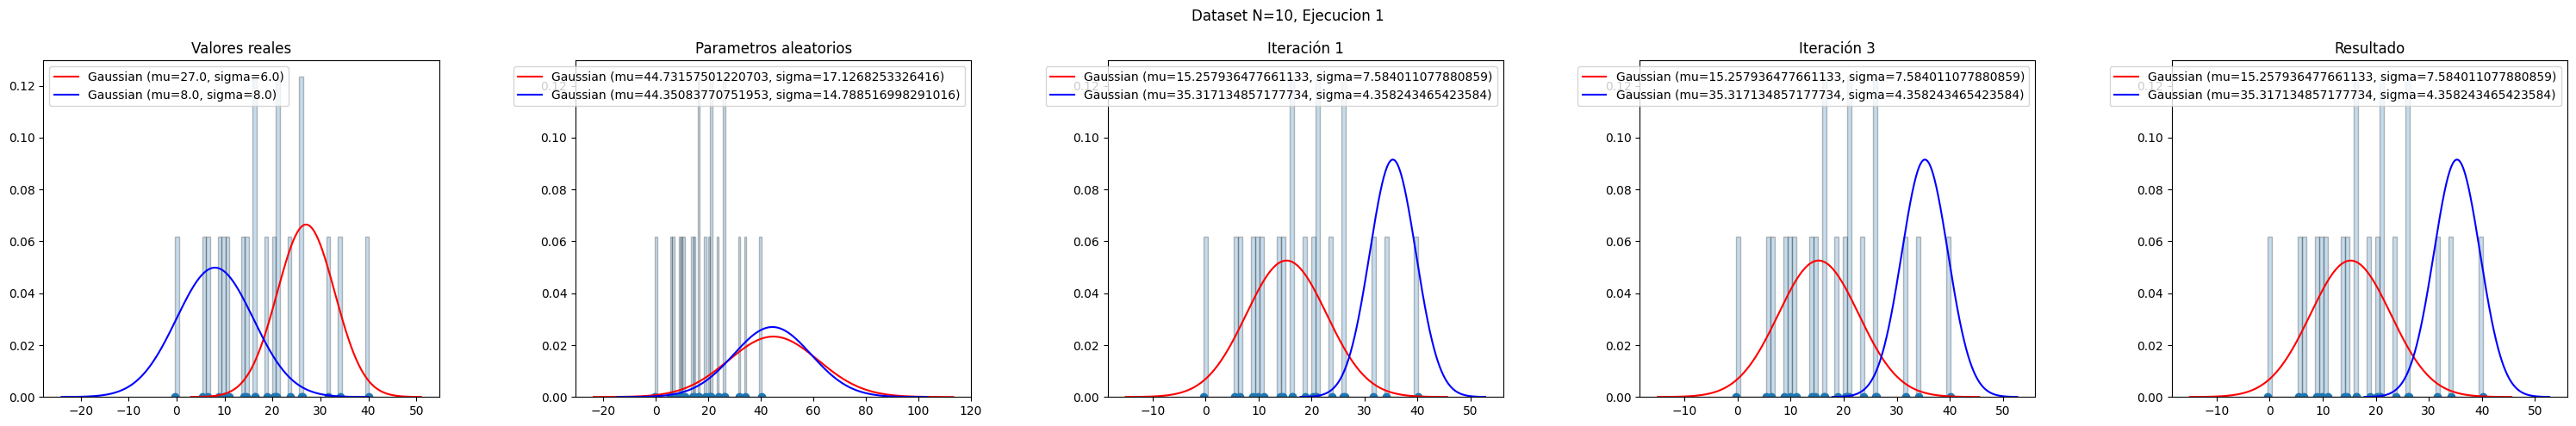

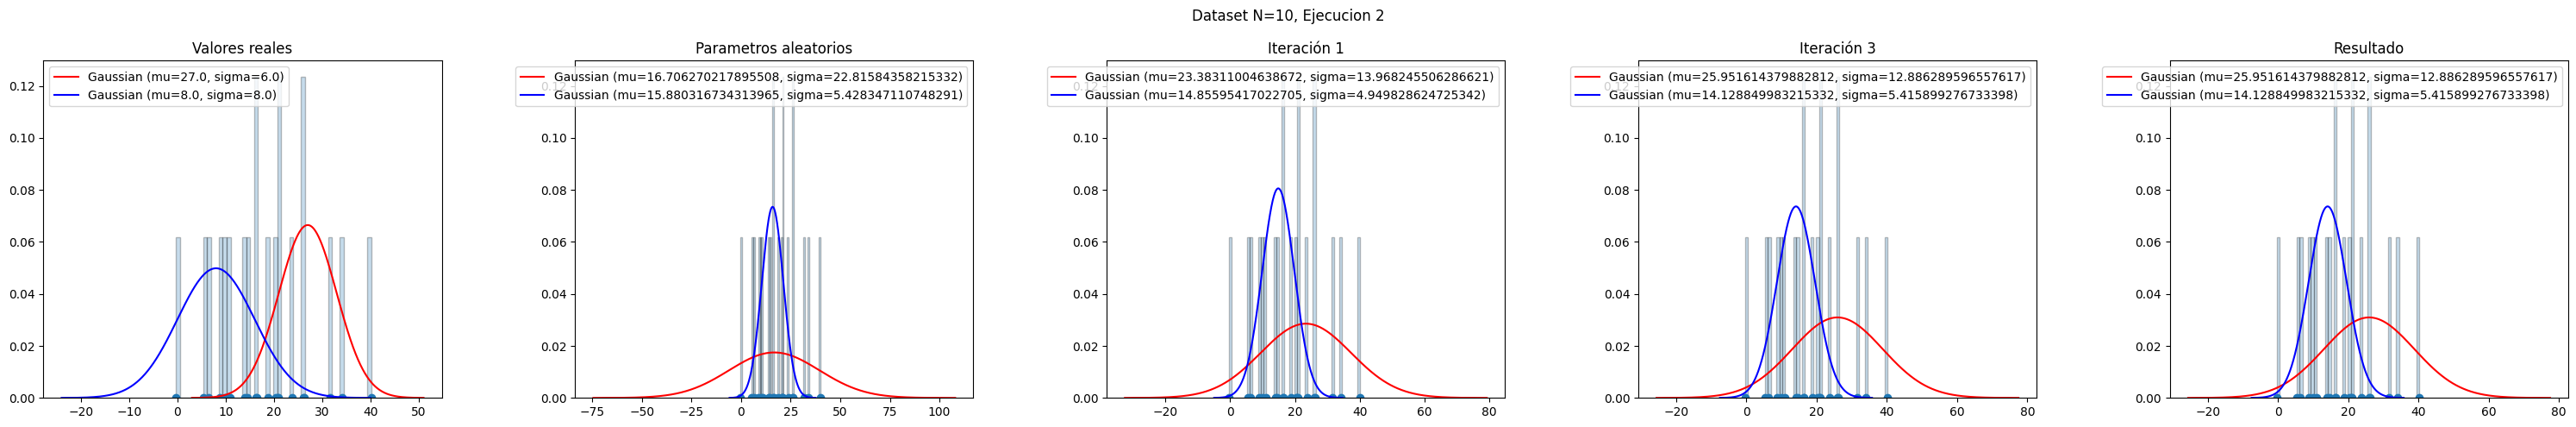

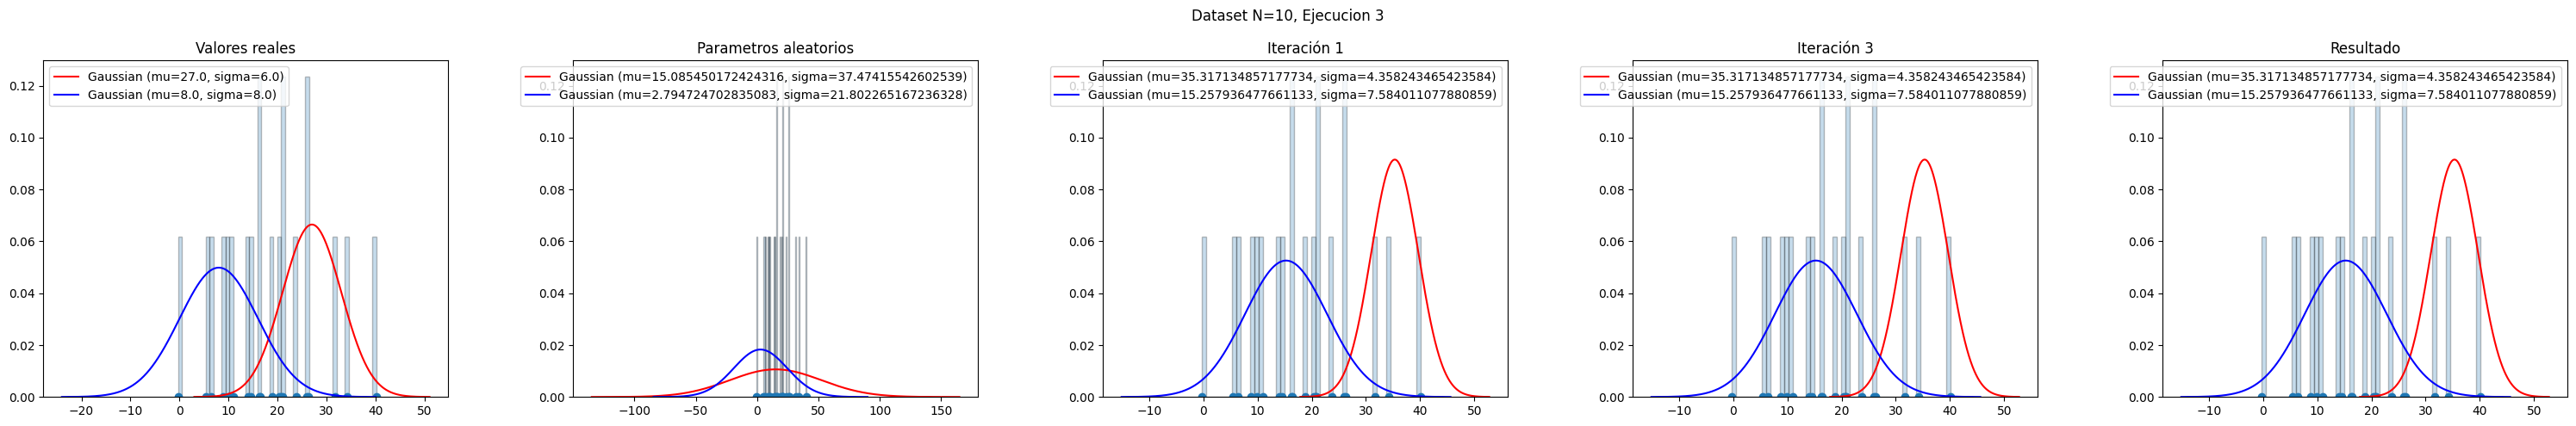

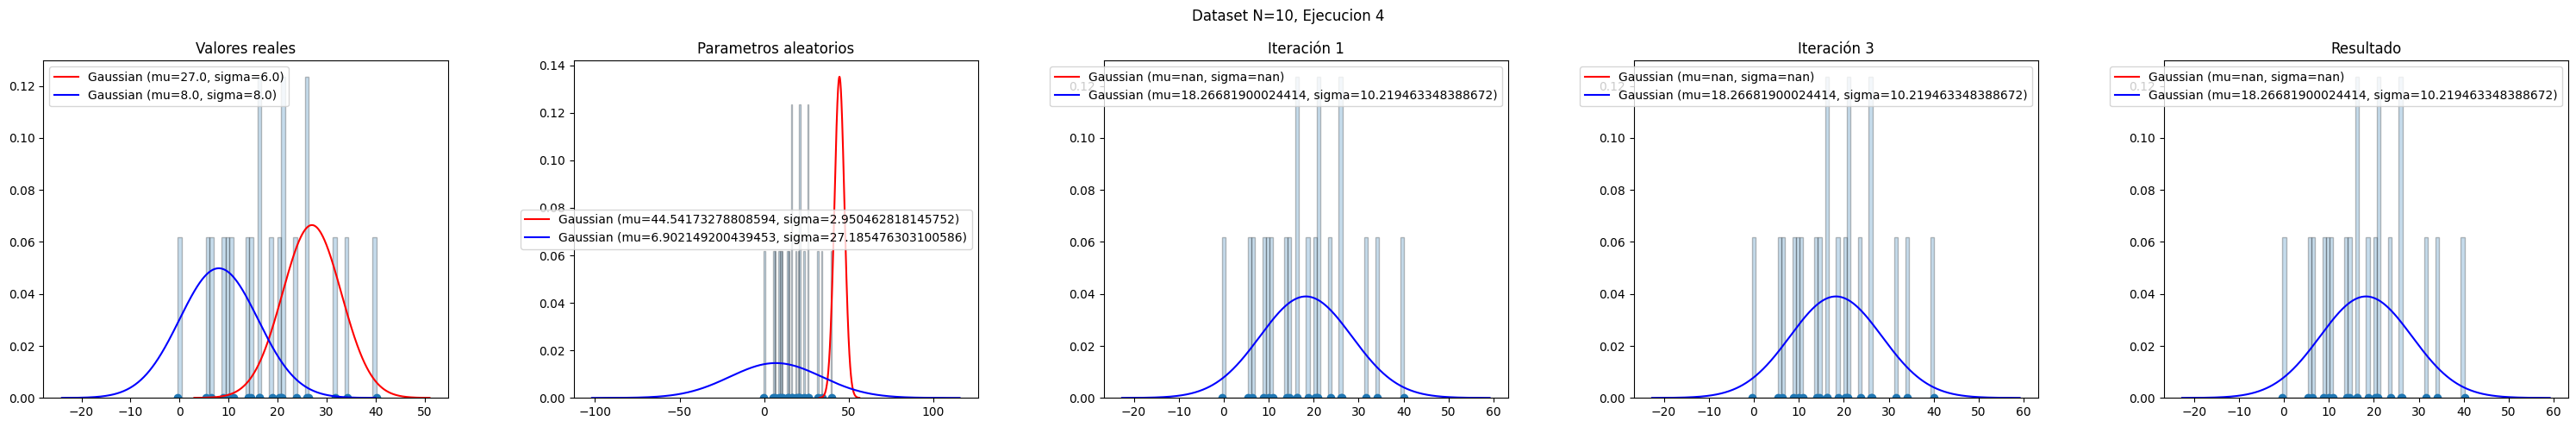

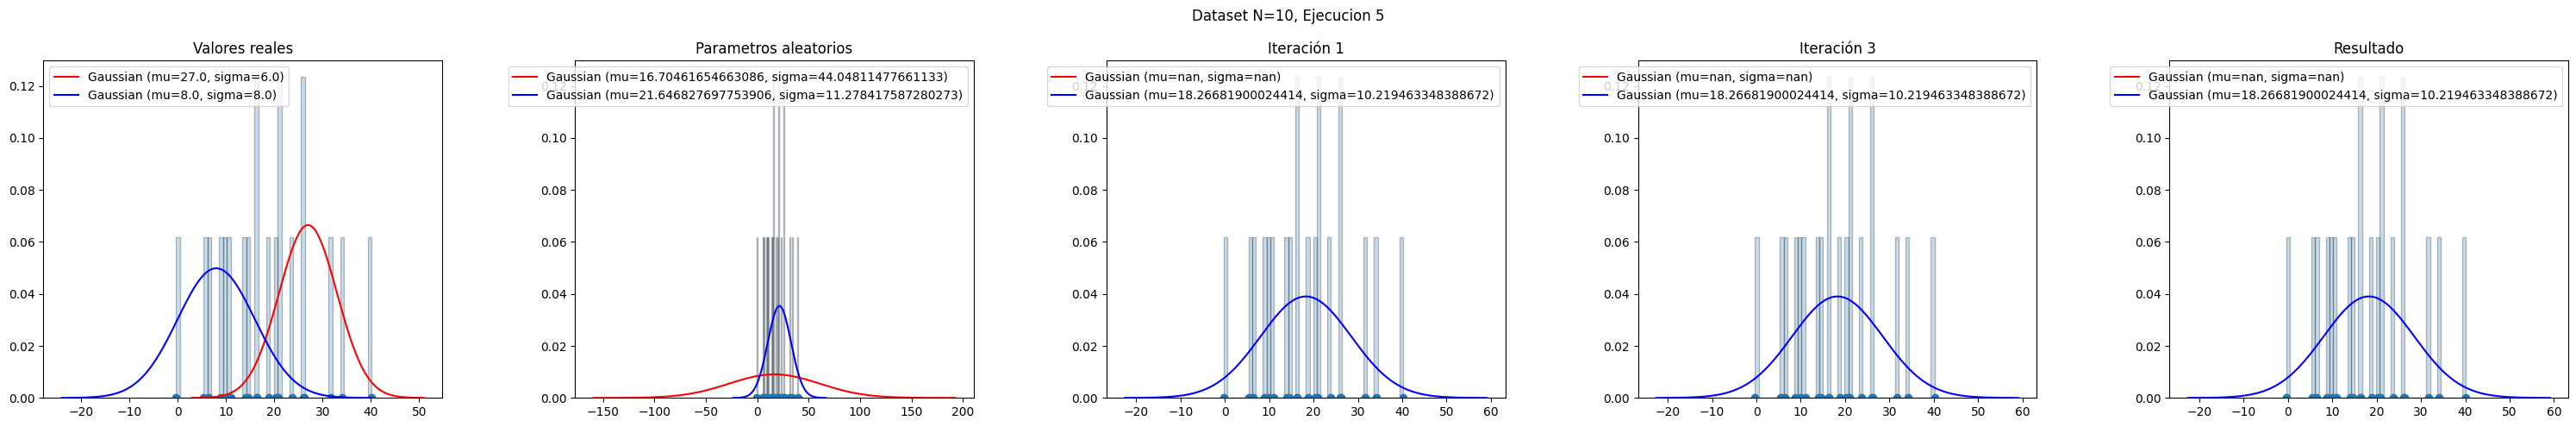

1 & 44.73, 17.13 & 15.26, 7.58 & 44.35, 14.79 & 35.32, 4.36 \\ \hline 
2 & 16.71, 22.82 & 25.95, 12.89 & 15.88, 5.43 & 14.13, 5.42 \\ \hline 
3 & 15.09, 37.47 & 35.32, 4.36 & 2.79, 21.8 & 15.26, 7.58 \\ \hline 
4 & 44.54, 2.95 & nan, nan & 6.9, 27.19 & 18.27, 10.22 \\ \hline 
5 & 16.7, 44.05 & nan, nan & 21.65, 11.28 & 18.27, 10.22 \\ \hline 



In [98]:
lista_parametros = [
    {
        "n": 1000,
        "mus": (10.0, 40.0),
        "sigmas": (10.0, 5.0)
    },
    {
        "n": 100,
        "mus": (5.0, 30.0),
        "sigmas": [1, 5]
    },
    {
        "n": 10,
        "mus": [27.0, 8.0],
        "sigmas": [6.0, 8.0]
    }
]

for parametros in lista_parametros:
    n = parametros["n"]
    mus = []
    sigmas = []
    titles = []
    mu1 = parametros["mus"][0]
    mu2 = parametros["mus"][1]
    sigma1 = parametros["sigmas"][0]
    sigma2 = parametros["sigmas"][1]
    X = generate_data(n, mu1, sigma1, mu2, sigma2)

    
    # plot(X, mu1, sigma1, mu2, sigma2, "Datos generados con base a los parámetros dados")
    total = ''
    for i in range(1,6):
        g1 = ''
        g2 = ''
        mus.append([mu1, mu2])
        sigmas.append([sigma1, sigma2])
        titles.append("Valores reales")
        P = init_random_parameters()
        g1 = '{} & {}, {}'.format(i, round(P[0][0].item(), 2), round(P[0][1].item(), 2))
        g2 = '{}, {}'.format(round(P[1][0].item(), 2), round(P[1][1].item(), 2))
        mus.append([P[0][0], P[1][0]])
        sigmas.append([P[0][1], P[1][1]])
        titles.append("Parametros aleatorios")

        for a in range(10):
            M = calculate_membership_dataset(X, P)

            P = recalculate_parameters(X, M)
            if a == 1 or a == 3:
                mus.append([P[0][0], P[1][0]])
                sigmas.append([P[0][1], P[1][1]])
                titles.append("Iteración {}".format(a))
        mus.append([P[0][0], P[1][0]])
        sigmas.append([P[0][1], P[1][1]])
        g1 += ' & {}, {}'.format(round(P[0][0].item(), 2), round(P[0][1].item(), 2))
        g2 += ' & {}, {}'.format(round(P[1][0].item(), 2), round(P[1][1].item(), 2))
        total += '{} & {} \\\\ \hline \n'.format(g1, g2)
        titles.append("Resultado")
        plot_multiple(X, mus, sigmas, titles, "Dataset N={}, Ejecucion {}".format(n, i), "n{}_{}_rp".format(n,i))
        mus = []
        sigmas = []
        titles = []
    print(total)

# Algoritmo de Maximización de la Esperanza con datos artificiales (modelo Gamma)

In [99]:
# Util funcitons

def gamma_distribution_density_data(k, theta):
    """
    Given a k and a theta, this function returns a tuple
    representing the X and Y of the PDF
    Parameters
    ----------
    k: int, required
        Number of clusters
    theta: int, required
        Theta gamma parameter
    Returns
    -------
    Tensor
        Data for gamma distribution based on gamma
        parameters
    """
    data = torch.linspace(k - 4*theta, k + 4*theta, 1000)
    gamma_distribution = ( (1/(gamma(k)*(theta**k))) * (data**(k-1)) * (torch.exp(-1 * data/theta)) )
    return data, gamma_distribution

def plot_gamma(X, k1, theta1, k2, theta2, title=''):
    """
    Plots data and 2 gamma distributions
    Parameters
    ----------
    X: tensor, required
        Data to plot
    k1: int, required
        First k gamma distribution parameter
    theta1: int, required
        First theta gamma distribution parameter
    k2: int, required
        Second k gamma distribution parameter
    theta2: int, required
        Second theta gamma distribution parameter
    """
    # a) Scatter Plot with histograms
    # Histograms
    plt.hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
    # Scatter
    plt.scatter(X,torch.zeros(len(X)))
    # DensityS
    x1, gamma_density_1 = gamma_distribution_density_data(k1, theta1)
    x2, gamma_density_2 = gamma_distribution_density_data(k2, theta2)
    plt.plot(x1, gamma_density_1, label=f'Gamma (k={k1}, theta={theta1})', color='red')
    plt.plot(x2, gamma_density_2, label=f'Gamma (k={k2}, theta={theta2})', color='blue')
    plt.ylim(0, 2)
    plt.xlim(0,torch.max(X))
    if len(title):
        plt.title(title)
    plt.legend()
    plt.show()

X =  tensor([0.0085, 0.0336, 1.2134, 2.4710, 0.0330, 0.4632, 0.7930, 3.1893, 4.2909,
        0.1364, 6.3242, 2.9093, 2.5866, 4.3866, 7.8430, 0.5348, 2.2066, 4.1142,
        0.4406, 2.0988])


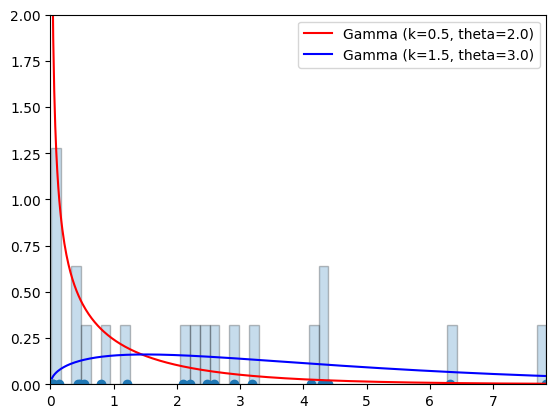

In [100]:
# 2)
k1 = .5
theta1 = 2.0
k2 = 1.5
theta2 = 3.0
# Generates data that follows two gamma distributions based on a set of parameters.
# parameters:
#    * k: shape
#    * theta:  scale
def generate_gamma_data(n, k1, theta1, k2, theta2):
  """
  Generates 2*n number of data combination from two gamma distributions
  Parameters
  ----------
  n: int, required
      Number of elements to generate for each gamma distribution
  k1: int, required
      First k gamma distribution parameter
  theta1: int, required
      First theta gamma distribution parameter
  k2: int, required
      Second k gamma distribution parameter
  theta2: int, required
      Second theta gamma distribution parameter
  Returns
  -------
  Tensor
      Generated data of length of 2*n
  """
  # Generate distributions
  gamma_dist1 = torch.distributions.Gamma(torch.tensor([k1]), 1/torch.tensor([theta1]))
  gamma_dist2 = torch.distributions.Gamma(torch.tensor([k2]), 1/torch.tensor([theta2]))

  # Take a sample from each dist
  gamma_sample1 = gamma_dist1.sample((n,1)).squeeze()
  gamma_sample2 = gamma_dist2.sample((n,1)).squeeze()

  # Concatenate the 2 samples
  X =  torch.cat((gamma_sample1, gamma_sample2))
  return X

X = generate_gamma_data(n, k1, theta1, k2, theta2)
print('X = ', X)

plot_gamma(X, k1, theta1, k2, theta2)


In [101]:
def calculate_log_likelihood_gamma_observation(x_n, k_n, theta_n):
    """
    Given a k, a theta, and an x observation this function returns the
    logarithmic likelyhood that said x belongs to the gamma distribution
    that results from that k and theta.
    Parameters
    ----------
    x_n: tensor, required
        Gamma distribution data
    k_n: int, required
        k gamma distribution parameter
    theta_n: int, required
        Theta gamma distribution parameter
    Returns
    -------
    Tensor
        Likelihood
    """
    # logarithmic gamma distribution.
    if x_n > 0:
      a = -1*(k_n*torch.log(torch.tensor(gamma(k_n)*theta_n)))
      b = (k_n-1)*torch.log(x_n)
      c = -1*x_n/theta_n
      likelihood = a + b + c
    else:
      likelihood = 0

    return likelihood

In [102]:
# 2)
def init_random_parameters(k=2, range=5):
  """
  Generates K set of random parameters of k and theta
  Parameters
  ----------
  K: int, required
      Number of set of parameters
  range : int, optional
      Maximum value a parameter could take
  Returns
  -------
  Matrix
      A Kx2 matrix of k and theta parameters
  """
  return torch.rand((k, 2))*range

P = init_random_parameters()
print('P = ', P)

def calculate_membership_dataset_gamma(X_dataset, Parameters_matrix):
  """
  Calculates membership of elements in X_dataset for each cluster K,
  where Parameters_matrix dimension is Kx2
  Parameters
  ----------
  X_dataset: tensor, required
      Data to determine membership
  Parameters_matrixk : tensor, required
      K set of parameters of k and theta
  Returns
  -------
  Matrix
      Membership matrix
  """
  N = len(X_dataset)
  K = Parameters_matrix.shape[0]
  M = torch.zeros(N, K)

  # for each element in X, calculate its likelyhood with each set of parameters from the Parameter Matrix and store the maximum
  for x in range(N):
    # set max likelyhood initially as a very low number (Me suena que esto también podría ponerse de una mejor forma)
    x_max_likelyhood = -999999999
    k_membership = 0
    # iterate over the parameter sets to find which set achieves max likelihood over x
    for k_index, parameters in enumerate(Parameters_matrix):
      x_likelyhood = calculate_log_likelihood_gamma_observation(X_dataset[x], parameters[0], parameters[1])
      if x_likelyhood > x_max_likelyhood:
        x_max_likelyhood = x_likelyhood
        k_membership = k_index
    M[x][k_membership] = 1

  return M

M = calculate_membership_dataset(X, P)
print('M = ', M)

P =  tensor([[4.5295, 2.1458],
        [4.8016, 2.1983]])
M =  tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])


C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


In [103]:
def recalculate_parameters_gamma(X_dataset, Membership_data):
    """
    Recalculates parameters k=2 and theta for each membership
    Parameters
    ----------
    X_dataset: tensor, required
        Data to determine membership
    Membership_data : tensor, required
        Indicates for each element in X_dataset its membership
        to some K cluster
    Returns
    -------
    Matrix
        Kx2 set of parameters k and theta for k=2 clusters
    """
    # TODO: Can we improve this to use torch?
    membership_k1 = Membership_data[:,0]
    membership_k2 = Membership_data[:,1]
    k1_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k1[index] == 1])
    k2_tentative_values = torch.tensor([x for index, x in enumerate(X_dataset) if membership_k2[index] == 1])
    k_1 = torch.mean(k1_tentative_values)**2 / torch.var(k1_tentative_values)
    k_2 = torch.mean(k2_tentative_values)**2 / torch.var(k2_tentative_values)
    theta_1 = torch.var(k1_tentative_values)/ torch.mean(k1_tentative_values)
    theta_2 = torch.var(k2_tentative_values)/ torch.mean(k2_tentative_values)
    return torch.tensor([[k_1, theta_1],[k_2, theta_2]])

print('Real parameters k1=[{},{}], k2=[{},{}] '.format(k1, theta1, k2, theta2))
print('Old P parameters: ', P)
P = recalculate_parameters(X, M)
print('New P parameters: ', P)

Real parameters k1=[0.5,2.0], k2=[1.5,3.0] 
Old P parameters:  tensor([[4.5295, 2.1458],
        [4.8016, 2.1983]])
New P parameters:  tensor([[1.7728, 1.5631],
        [7.0836, 1.0739]])


# Ejecucion Gamma con datos Gaussianos

C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


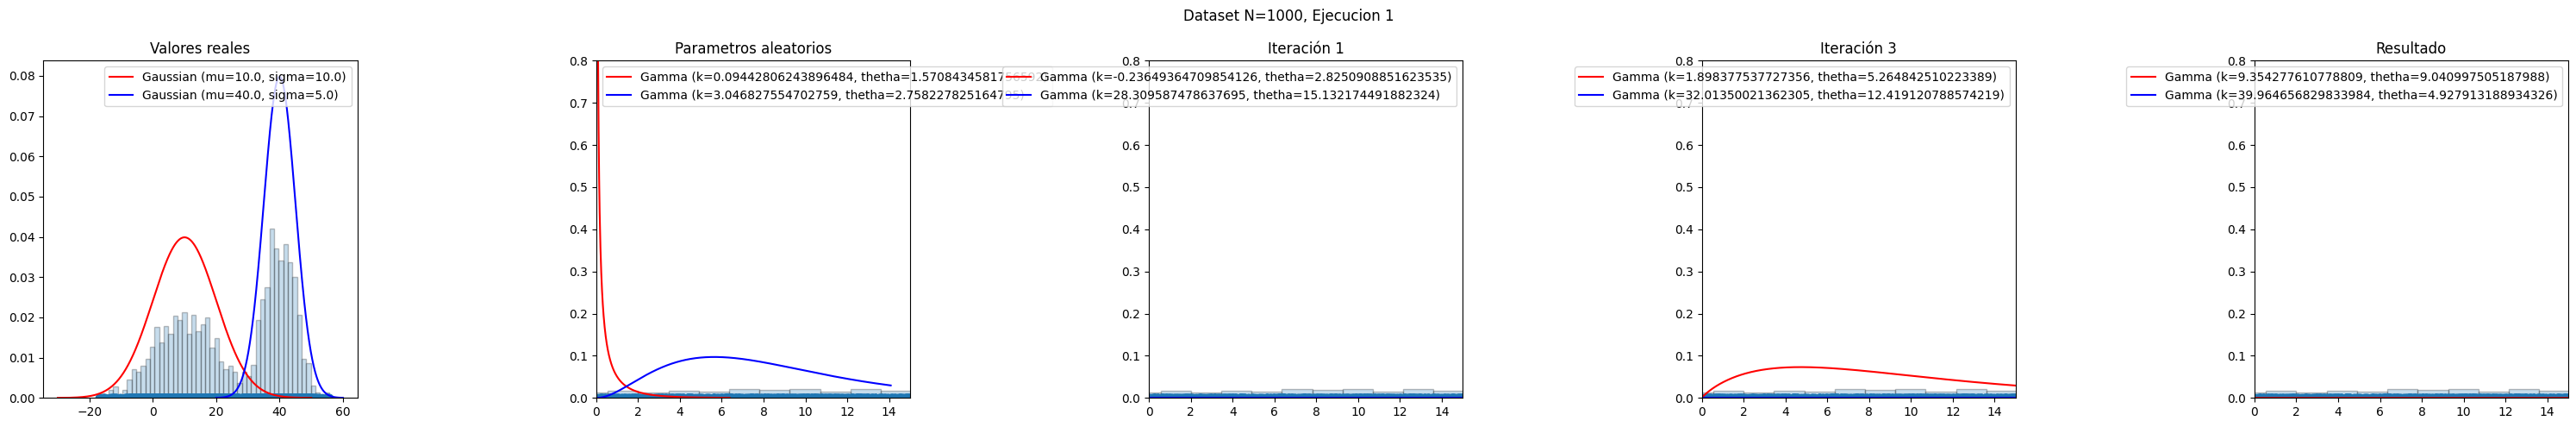

1 & 0.09, 1.57 & 9.35, 9.04 & 3.05, 2.76 & 39.96, 4.93 \\ \hline 



In [104]:
def plot_multiple(X, mus, sigmas, titles, general_title = "", img_name= ''): 
    rows = len(titles) 
    fig, axes = plt.subplots(1, rows, figsize=(30, 5)) 
 
    for i in range(rows): 
        if i == 0:
            axes[i].hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
            axes[i].scatter(X,torch.zeros(len(X)))
            mu1 = mus[i][0]
            mu2 = mus[i][1]
            sigma1 = sigmas[i][0]
            sigma2 = sigmas[i][1]
            x1, gaussian_density_1 = gaussian_distribution_density_data(mu1, sigma1)
            x2, gaussian_density_2 = gaussian_distribution_density_data(mu2, sigma2)
            axes[i].plot(x1, gaussian_density_1, label=f'Gaussian (mu={mu1}, sigma={sigma1})', color='red')
            axes[i].plot(x2, gaussian_density_2, label=f'Gaussian (mu={mu2}, sigma={sigma2})', color='blue')
            axes[i].set_title(titles[i])
            axes[i].legend()
            continue
        axes[i].hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black') 
        axes[i].scatter(X,torch.zeros(len(X))) 
        #axes[i].set_ylim(0, .3) 
        axes[i].set_ylim(0, 7) 
        mu1 = mus[i][0] 
        mu2 = mus[i][1] 
        sigma1 = sigmas[i][0] 
        sigma2 = sigmas[i][1] 
        x1, gaussian_density_1 = gamma_distribution_density_data(mu1, sigma1) 
        x2, gaussian_density_2 = gamma_distribution_density_data(mu2, sigma2)
        axes[i].set_ylim(0, 0.8)
        axes[i].set_xlim(0,15)
        axes[i].plot(x1, gaussian_density_1, label=f'Gamma (k={mu1}, thetha={sigma1})', color='red') 
        axes[i].plot(x2, gaussian_density_2, label=f'Gamma (k={mu2}, thetha={sigma2})', color='blue') 
        axes[i].set_title(titles[i]) 
        axes[i].legend() 
 
    if len(general_title): 
        fig.suptitle(general_title) 
    plt.tight_layout() 
    plt.savefig('{}.svg'.format(img_name)) 
    plt.show()


lista_parametros = [
    {
        "n": 1000,
        "mus": (10.0, 40.0),
        "sigmas": (10.0, 5.0)
    }
]

for parametros in lista_parametros:
    n = parametros["n"]
    mus = []
    sigmas = []
    titles = []
    mu1 = parametros["mus"][0]
    mu2 = parametros["mus"][1]
    sigma1 = parametros["sigmas"][0]
    sigma2 = parametros["sigmas"][1]
    X = generate_data(n, mu1, sigma1, mu2, sigma2)

    # plot(X, mu1, sigma1, mu2, sigma2, "Datos generados con base a los parámetros dados") 
    total = '' 
    for i in range(1,2): 
        g1 = '' 
        g2 = '' 
        ks.append([mu1, mu2]) 
        thetas.append([sigma1, sigma2]) 
        titles.append("Valores reales") 
        #P = random_parameters_heuristic(X) 
        #P = recalculate_parameters(X) 
        P = init_random_parameters() 
        g1 = '{} & {}, {}'.format(i, round(P[0][0].item(), 2), round(P[0][1].item(), 2)) 
        g2 = '{}, {}'.format(round(P[1][0].item(), 2), round(P[1][1].item(), 2)) 
        ks.append([P[0][0], P[1][0]]) 
        thetas.append([P[0][1], P[1][1]]) 
        titles.append("Parametros aleatorios") 
 
        for a in range(10): 
            M = calculate_membership_dataset(X, P) 
 
            P = recalculate_parameters(X, M) 
            if a == 1 or a == 3: 
                ks.append([P[0][0], P[1][0]]) 
                thetas.append([P[0][1], P[1][1]]) 
                titles.append("Iteración {}".format(a)) 
        ks.append([P[0][0], P[1][0]]) 
        thetas.append([P[0][1], P[1][1]]) 
        g1 += ' & {}, {}'.format(round(P[0][0].item(), 2), round(P[0][1].item(), 2)) 
        g2 += ' & {}, {}'.format(round(P[1][0].item(), 2), round(P[1][1].item(), 2)) 
        total += '{} & {} \\\\ \hline \n'.format(g1, g2) 
        titles.append("Resultado") 
        plot_multiple(X, ks, thetas, titles, "Dataset N={}, Ejecucion {}".format(n, i), img_name='{}-{}'.format(n, i)) 
        ks = [] 
        thetas = [] 
        titles = [] 
    print(total)

# Ejecucion Gaussiana con Modelo Gamma

C:\Users\joroc\AppData\Local\Temp\ipykernel_11004\1105068272.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return -(1 / 2) * torch.log(torch.tensor(2 * torch.pi)) - 1 * torch.log(torch.tensor(sigma_k)) - (1 / (2 * sigma_k**2)) * torch.sum((x_n - mu_k) ** 2)


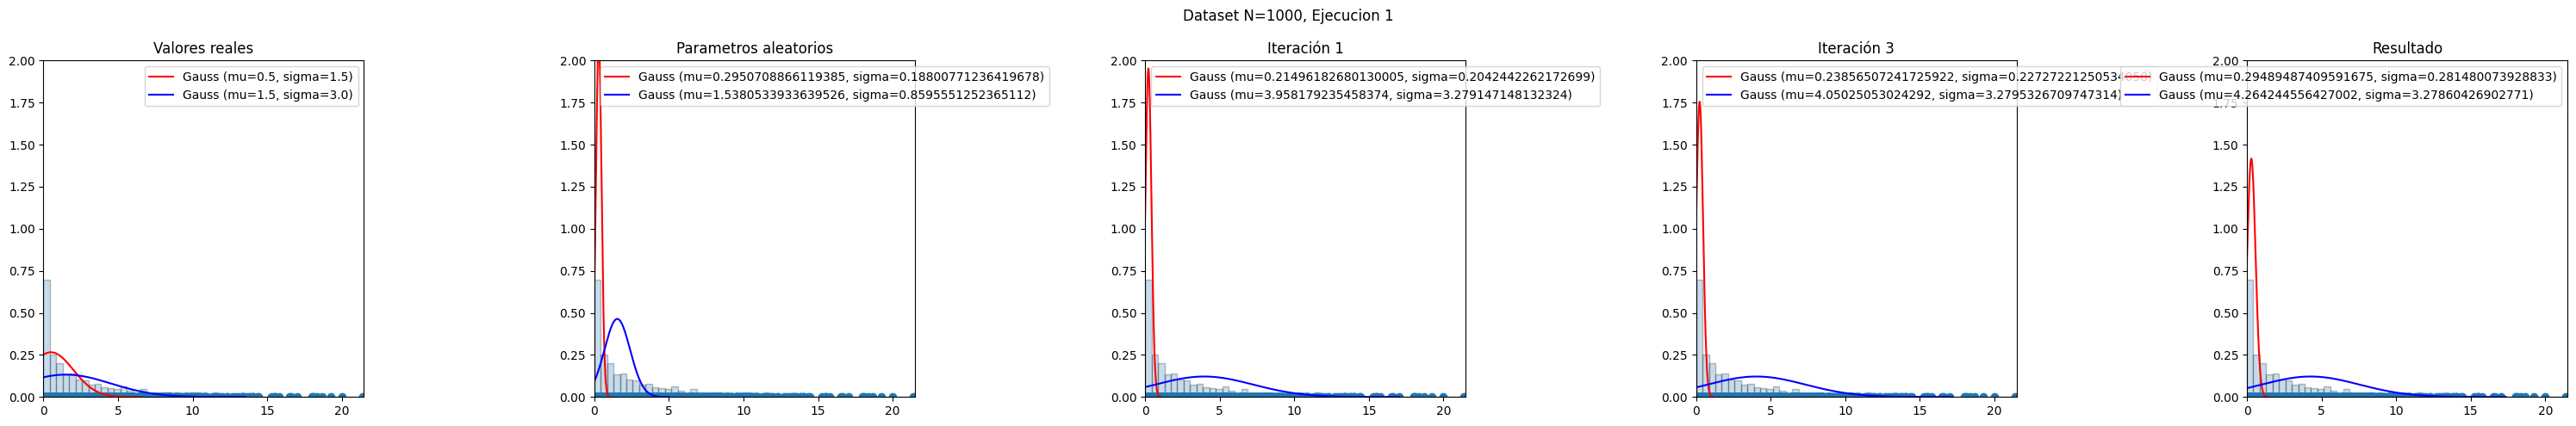

1 & 0.3, 0.19 & 0.29, 0.28 & 1.54, 0.86 & 4.26, 3.28 \\ \hline 



In [106]:
def plot_multiple_gauss_in_gama(X, mus, sigmas, titles, general_title = "", img_name= ''):
    rows = len(titles)
    fig, axes = plt.subplots(1, rows, figsize=(30, 5))

    for i in range(rows):
        axes[i].hist(X, bins=50, alpha=0.25, density = True, histtype='bar', ec='black')
        axes[i].scatter(X,torch.zeros(len(X)))
        mu1 = mus[i][0]
        mu2 = mus[i][1]
        sigma1 = sigmas[i][0]
        sigma2 = sigmas[i][1]
        x1, gaussian_density_1 = gaussian_distribution_density_data(mu1, sigma1)
        x2, gaussian_density_2 = gaussian_distribution_density_data(mu2, sigma2)
        axes[i].plot(x1, gaussian_density_1, label=f'Gauss (mu={mu1}, sigma={sigma1})', color='red')
        axes[i].plot(x2, gaussian_density_2, label=f'Gauss (mu={mu2}, sigma={sigma2})', color='blue')
        axes[i].set_ylim(0, 2)
        axes[i].set_xlim(0,torch.max(X))
        axes[i].set_title(titles[i])
        axes[i].legend()
    
    if len(general_title):
        fig.suptitle(general_title)
    plt.tight_layout()
    plt.savefig('{}.svg'.format(img_name))
    plt.show()

lista_parametros = [
    {
        "n": 1000,
        "k": (0.5, 1.5),
        "theta": (1.5, 3.0)
    }
]

for parametros in lista_parametros:
    n = int(parametros["n"])
    ks = []
    thetas = []
    titles = []
    k1 = float(parametros["k"][0])
    k2 = float(parametros["k"][1])
    theta1 = float(parametros["theta"][0])
    theta2 = float(parametros["theta"][1])
    X = generate_gamma_data(n, k1, theta1, k2, theta2)

    total = ''
    for i in range(1,2):
        g1 = ''
        g2 = ''
        ks.append([k1, k2])
        thetas.append([theta1, theta2])
        titles.append("Valores reales")
        P = init_random_parameters(k=2, range=2)
        g1 = '{} & {}, {}'.format(i, round(P[0][0].item(), 2), round(P[0][1].item(), 2))
        g2 = '{}, {}'.format(round(P[1][0].item(), 2), round(P[1][1].item(), 2))
        ks.append([P[0][0], P[1][0]])
        thetas.append([P[0][1], P[1][1]])
        titles.append("Parametros aleatorios")

        for a in range(10):
            M = calculate_membership_dataset(X, P)

            P = recalculate_parameters(X, M)
            if a == 1 or a == 3:
                ks.append([P[0][0], P[1][0]])
                thetas.append([P[0][1], P[1][1]])
                titles.append("Iteración {}".format(a))
        ks.append([P[0][0], P[1][0]])
        thetas.append([P[0][1], P[1][1]])
        g1 += ' & {}, {}'.format(round(P[0][0].item(), 2), round(P[0][1].item(), 2))
        g2 += ' & {}, {}'.format(round(P[1][0].item(), 2), round(P[1][1].item(), 2))
        total += '{} & {} \\\\ \hline \n'.format(g1, g2)
        titles.append("Resultado")
        plot_multiple_gauss_in_gama(X, ks, thetas, titles, "Dataset N={}, Ejecucion {}".format(n, i), img_name='gammaDataInGaussAlgorithm {}-{}'.format(n, i))
        ks = []
        thetas = []
        titles = []
    print(total)